In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [6]:
bn = gum.loadBN("instances/bn-10n-10a-1.bif")
bn

(pyagrum.BayesNet@0x131474c00) BN{nodes: 10, arcs: 10, domainSize: 13824, dim: 58, mem: 720o}

In [7]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-10n-10a-1-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:34<00:00,  3.46s/it]


CPU times: user 1.25 s, sys: 134 ms, total: 1.38 s
Wall time: 557 ms
CPU times: user 1.38 s, sys: 147 ms, total: 1.53 s
Wall time: 605 ms


## Results of the data/bn-10n-10a-1-test10.csv

### Markov equivalence class (PAG)

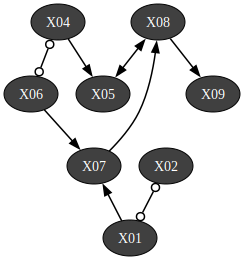

### Causal differences

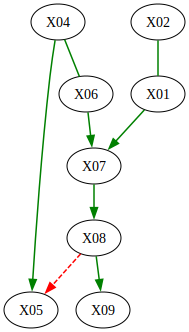

CPU times: user 1.55 s, sys: 152 ms, total: 1.7 s
Wall time: 876 ms
CPU times: user 1.09 s, sys: 105 ms, total: 1.2 s
Wall time: 743 ms


## Results of the data/bn-10n-10a-1-test8.csv

### Markov equivalence class (PAG)

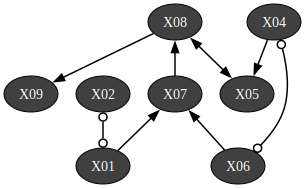

### Causal differences

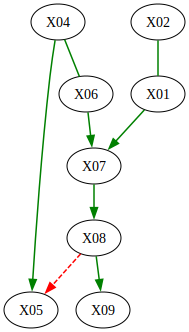

CPU times: user 1.26 s, sys: 129 ms, total: 1.39 s
Wall time: 517 ms
CPU times: user 1.12 s, sys: 111 ms, total: 1.23 s
Wall time: 456 ms


## Results of the data/bn-10n-10a-1-test9.csv

### Markov equivalence class (PAG)

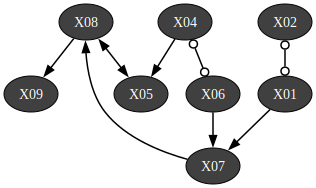

### Causal differences

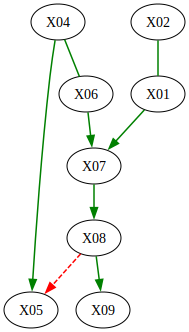

CPU times: user 1.34 s, sys: 144 ms, total: 1.49 s
Wall time: 590 ms
CPU times: user 665 ms, sys: 73.3 ms, total: 739 ms
Wall time: 312 ms


## Results of the data/bn-10n-10a-1-test7.csv

### Markov equivalence class (PAG)

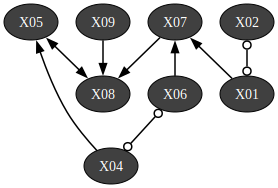

### Causal differences

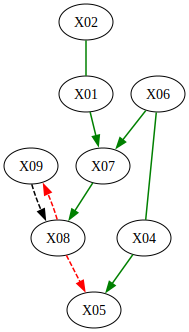

CPU times: user 1.58 s, sys: 141 ms, total: 1.72 s
Wall time: 819 ms
CPU times: user 955 ms, sys: 92.1 ms, total: 1.05 s
Wall time: 332 ms


## Results of the data/bn-10n-10a-1-test6.csv

### Markov equivalence class (PAG)

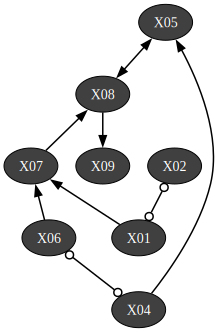

### Causal differences

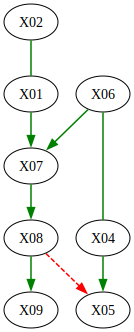

CPU times: user 1.29 s, sys: 109 ms, total: 1.4 s
Wall time: 196 ms
CPU times: user 622 ms, sys: 48.1 ms, total: 670 ms
Wall time: 92 ms


## Results of the data/bn-10n-10a-1-test4.csv

### Markov equivalence class (PAG)

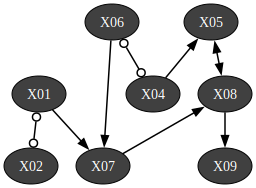

### Causal differences

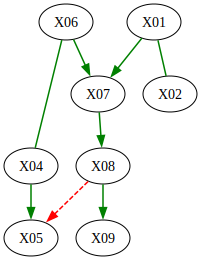

CPU times: user 1.17 s, sys: 110 ms, total: 1.28 s
Wall time: 190 ms
CPU times: user 780 ms, sys: 59.1 ms, total: 839 ms
Wall time: 111 ms


## Results of the data/bn-10n-10a-1-test5.csv

### Markov equivalence class (PAG)

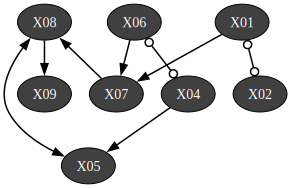

### Causal differences

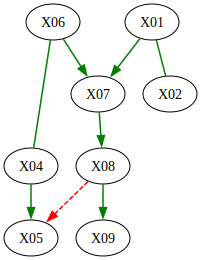

CPU times: user 1.4 s, sys: 137 ms, total: 1.54 s
Wall time: 477 ms
CPU times: user 1.15 s, sys: 92 ms, total: 1.24 s
Wall time: 347 ms


## Results of the data/bn-10n-10a-1-test1.csv

### Markov equivalence class (PAG)

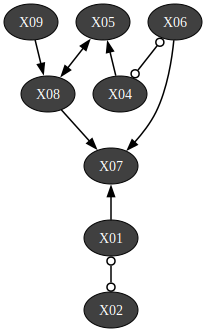

### Causal differences

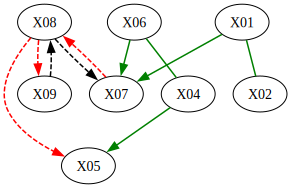

CPU times: user 1.39 s, sys: 142 ms, total: 1.53 s
Wall time: 826 ms
CPU times: user 781 ms, sys: 79.4 ms, total: 860 ms
Wall time: 507 ms


## Results of the data/bn-10n-10a-1-test2.csv

### Markov equivalence class (PAG)

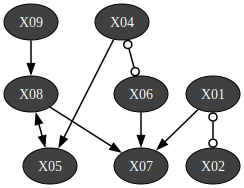

### Causal differences

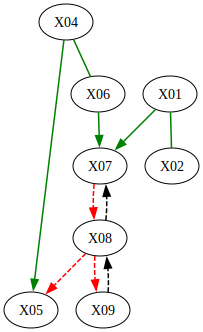

CPU times: user 1.3 s, sys: 137 ms, total: 1.44 s
Wall time: 564 ms
CPU times: user 840 ms, sys: 93.2 ms, total: 933 ms
Wall time: 405 ms


## Results of the data/bn-10n-10a-1-test3.csv

### Markov equivalence class (PAG)

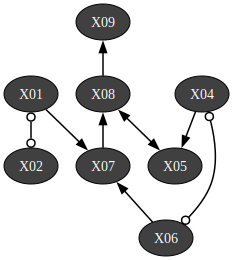

### Causal differences

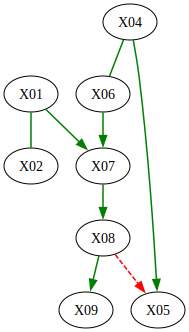

In [11]:
from pathlib import Path

for name in Path("data/").glob("bn-10n-10a-1-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X00", "X03"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )